## Cellpose dentrites simulation 

Related to this image.sc question https://forum.image.sc/t/cells-segmentation-with-dendrites/98897

Main issue is that is not detecting the "arms" of the cell

### Question - can cellpose be trained to find highly irregular shapes with appendages? 

To answer that let's do a simulation

1.  Goal is not to create a model that is biologically relevant. 
2.  Goal is to test the behavior of networks on objects of irregular shape with long appendages
3.  Goal is to test that the network(s) are wired right.
4.  If the simulation works move on to biological images. 

In [21]:
from tnia.deconvolution import psfs
from tnia.deconvolution import forward
from tnia.plotting.plt_helper import imshow_multi2d
from tnia.deeplearning.dl_helper import make_label_directory
from pathlib import Path
import os

tnia_images_path = Path(r'D:/images')
parent_path=Path(tnia_images_path / r'tnia-python-images\imagesc\2024_07_11_cellpose_with_dentrites')

if not os.path.exists(parent_path):
    os.makedirs(parent_path)

simulation_path = Path(parent_path / 'simulation')

if not os.path.exists(simulation_path):
    os.makedirs(simulation_path)

label_path = Path(parent_path / r'labels')

image_label_paths, mask_label_paths = make_label_directory(1, 1, label_path)

In [22]:
import napari
import numpy as np

imsize = (512, 512)

background = np.zeros(imsize, 'uint16')
background[:,:]=100
truth = np.zeros(imsize, 'uint16')

viewer = napari.Viewer()
viewer.add_image(background, name='background')
viewer.add_labels(truth, name='truth')

<Labels layer 'truth' at 0x16a85133e80>

In [29]:
from skimage.io import imread, imsave
#import matplotlib.pyplot as plt
#truth = imread(r'D:\images\tnia-python-images\imagesc\2024_07_11_cellpose_with_dentrites\simulation\phantom_1.tif')
#plt.imshow(truth)
imsave(r'D:\images\tnia-python-images\imagesc\2024_07_11_cellpose_with_dentrites\phantom1.tif', img)

In [10]:
from skimage.measure import label

labels = label(labels)

In [10]:
truth.sum()
truth.max(), truth.min()

(52, 0)

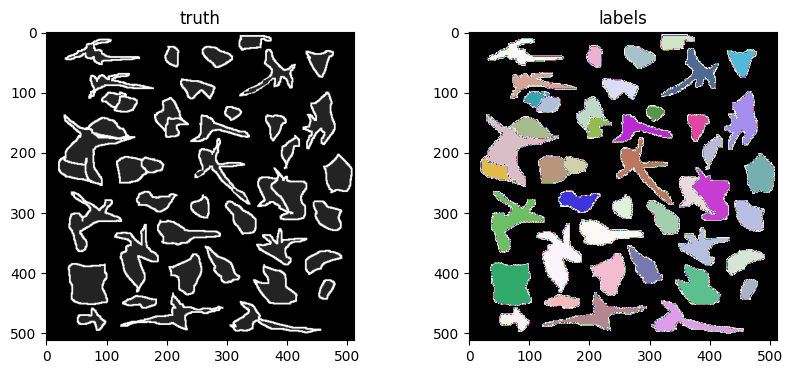

In [11]:
from tnia.plotting.plt_helper import imshow_multi2d
from tnia.plotting.plt_helper import random_label_cmap

fig = imshow_multi2d([truth, labels], ['truth', 'labels'], 1, 2, colormaps = ['gray', random_label_cmap()])

1.0
0 51


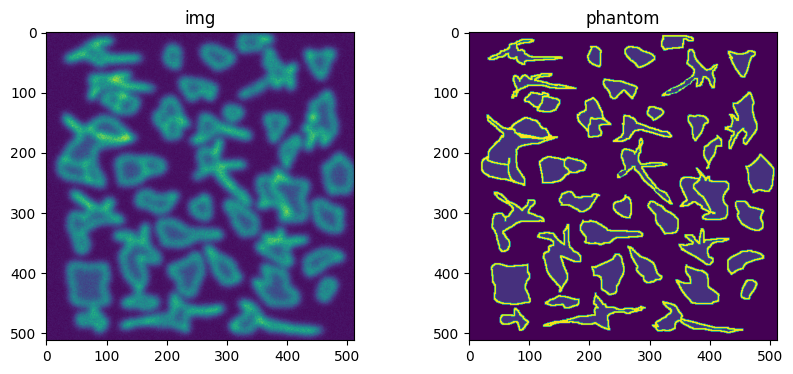

In [26]:
from tnia.deconvolution.gaussian_psf import gaussian_2d

psf = gaussian_2d(100, 6)

print(psf.sum())
print(truth.min(), truth.max())
img = forward.forward(5*truth, psf, 8,True, True).astype(np.float32)
fig = imshow_multi2d([img, truth], ["img", "phantom"], 1, 2)



## Save the simulated images

In [17]:
from skimage.io import imsave

name = 'phantom'
index = 0

phantom_name=parent_path / (name+str(index)+'.tif')

while (os.path.exists(phantom_name)==True):
    index=index+1
    phantom_name=parent_path / (name+'_'+str(index)+'.tif')

print(phantom_name)

imsave(parent_path / phantom_name, img)
imsave(simulation_path / phantom_name, truth)

D:\images\tnia-python-images\imagesc\2024_07_11_cellpose_with_dentrites\phantom_1.tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_17380\1248959616.py:15: UserWarning: D:\images\tnia-python-images\imagesc\2024_07_11_cellpose_with_dentrites\phantom_1.tif is a low contrast image
  imsave(simulation_path / phantom_name, truth)


## Save the labels

In this case the labels are derived directly from the simulation, so we just save the img and label generated during the simulation in the directory structure we have been using to store labels.

In [18]:
from tnia.deeplearning.dl_helper import generate_patch_names, generate_next_patch_name

name = 'label'

phantom_name, mask_name = generate_patch_names(str(image_label_paths[0]), str(mask_label_paths[0]), name)

base_name = generate_next_patch_name(str(image_label_paths[0]), name)

print(base_name)

print(phantom_name)
print(mask_name)

imsave(phantom_name, img)
imsave(mask_name, labels)


label_1
D:\images\tnia-python-images\imagesc\2024_07_11_cellpose_with_dentrites\labels\input0/label_1.tif
D:\images\tnia-python-images\imagesc\2024_07_11_cellpose_with_dentrites\labels\ground truth0/label_1.tif
label_1
